Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.5927
Epoch 200, Loss: 0.5384
Epoch 300, Loss: 0.5060
Epoch 400, Loss: 0.4852
Epoch 500, Loss: 0.4711
Epoch 600, Loss: 0.4611
Epoch 700, Loss: 0.4538
Epoch 800, Loss: 0.4483
Epoch 900, Loss: 0.4442

Accuracy on the test set: 0.7303


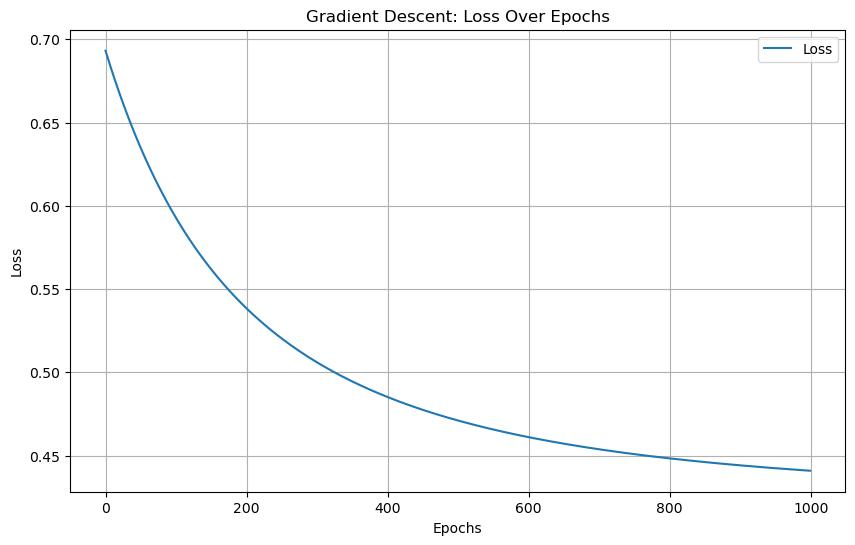

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better convergence in gradient descent.
    """
    # Vaishnav Nigade, Roll No: 2022BCD0045
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert the 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target variable (y)
    X = df.drop(columns=['Survived']).values  # Features: Pclass, Sex, Age, etc.
    y = df['Survived'].values  # Target: whether the passenger survived (1) or not (0)
    
    # Standardize the features to have mean 0 and variance 1 (helps gradient descent converge faster)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression using Gradient Descent
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for each iteration of gradient descent.
        - epochs: The number of iterations over the entire dataset.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []  # To store loss values over epochs for plotting

    def sigmoid(self, z):
        """
        Sigmoid activation function to map any real-valued number to the range (0, 1).
        - z: The input value or matrix
        Returns:
        - Sigmoid of z
        """
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """
        Train the Logistic Regression model using Gradient Descent.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Vaishnav Nigade, Roll No: 2022BCD0045
        # Initialize weights for each feature to zero and bias to zero
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Gradient Descent loop for the specified number of epochs
        for epoch in range(self.epochs):
            # Step 1: Calculate the linear combination of inputs and weights + bias
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)  # Apply sigmoid to get predictions between 0 and 1
            
            # Step 2: Compute the Binary Cross-Entropy Loss
            # Adding a small constant (1e-8) to avoid log(0) which results in NaN
            loss = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
            self.losses.append(loss)  # Store the loss for plotting later
            
            # Step 3: Calculate gradients for weights and bias
            # Error is the difference between predictions and actual values
            error = predictions - y
            
            # Gradient of the loss with respect to weights
            dw = np.dot(X.T, error) / len(y)
            
            # Gradient of the loss with respect to bias
            db = np.sum(error) / len(y)
            
            # Step 4: Update the weights and bias using the gradients and learning rate
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Print the loss every 100 epochs to monitor progress
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels (0 or 1) for given input data using the learned weights.
        - X: Feature matrix (test data)
        Returns:
        - Binary predictions (0 or 1)
        """
        # Vaishnav Nigade, Roll No: 2022BCD0045
        # Calculate the linear combination and apply sigmoid
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        
        # Convert probabilities to binary labels: >= 0.5 -> 1 (survived), < 0.5 -> 0 (did not survive)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and plot the loss over epochs
def train_and_evaluate():
    """
    Train the Logistic Regression model using Gradient Descent and evaluate its performance.
    Also, plot the loss over epochs to visualize convergence.
    """
    # Vaishnav Nigade, Roll No: 2022BCD0045
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the Logistic Regression model with learning rate and epochs
    model = LogisticRegressionGD(learning_rate=0.01, epochs=1000)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy of the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on the test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize how the model converges
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Gradient Descent: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


# Golden ratio

Optimal Learning Rate: 0.099986
Accuracy on test set: 0.7472


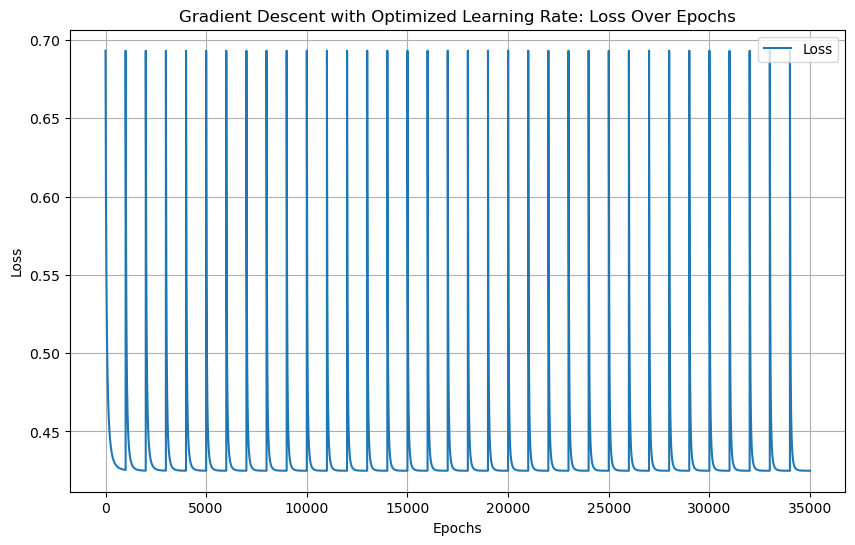

In [2]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Vaishnav Nigade, Roll No: 2022BCD0045
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert the 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target variable (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features to have mean 0 and variance 1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Gradient Descent
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for each iteration.
        - epochs: The number of iterations over the dataset.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """
        Train the Logistic Regression model using Gradient Descent.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for epoch in range(self.epochs):
            # Compute the linear combination and apply sigmoid activation
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Compute Binary Cross-Entropy Loss
            loss = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
            self.losses.append(loss)
            
            # Calculate gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)
            db = np.sum(error) / len(y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Predict binary labels."""
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

    def get_loss(self, X, y):
        """Calculate the loss for a given dataset."""
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        loss = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
        return loss

# Step 3: Implement Golden Section Search to optimize the learning rate
def golden_section_search(X_train, y_train, X_test, y_test, model, a=0.001, b=0.1, tol=1e-5):
    """
    Use Golden Section Search to find the optimal learning rate.
    - a: Lower bound of the search interval
    - b: Upper bound of the search interval
    - tol: Tolerance level for convergence
    """
    # Golden Ratio
    gr = (np.sqrt(5) - 1) / 2
    
    # Define points within the interval
    c = b - gr * (b - a)
    d = a + gr * (b - a)
    
    while abs(c - d) > tol:
        # Evaluate loss for learning rates c and d
        model.learning_rate = c
        model.fit(X_train, y_train)
        loss_c = model.get_loss(X_test, y_test)
        
        model.learning_rate = d
        model.fit(X_train, y_train)
        loss_d = model.get_loss(X_test, y_test)
        
        # Narrow down the search interval
        if loss_c < loss_d:
            b = d
        else:
            a = c
        
        # Update c and d
        c = b - gr * (b - a)
        d = a + gr * (b - a)
    
    # Return the midpoint as the optimal learning rate
    return (a + b) / 2

# Step 4: Train the model with the optimal learning rate and evaluate performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using the optimal learning rate found via Golden Section Search.
    """
    # Load and preprocess data
    X, y = load_and_preprocess_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionGD(epochs=1000)
    
    # Find the optimal learning rate using Golden Section Search
    optimal_lr = golden_section_search(X_train, y_train, X_test, y_test, model)
    print(f"Optimal Learning Rate: {optimal_lr:.6f}")
    
    # Train the model using the optimal learning rate
    model.learning_rate = optimal_lr
    model.fit(X_train, y_train)
    
    # Evaluate model performance on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")

    # Plot the loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Gradient Descent with Optimized Learning Rate: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Run the training and evaluation function
train_and_evaluate()


# with Armijo rule

Epoch 0, Loss: 0.6931, Learning Rate: 0.000000
Epoch 100, Loss: 0.6931, Learning Rate: 0.000000
Epoch 200, Loss: 0.6931, Learning Rate: 0.000000
Epoch 300, Loss: 0.6931, Learning Rate: 0.000000
Epoch 400, Loss: 0.6931, Learning Rate: 0.000000
Epoch 500, Loss: 0.6931, Learning Rate: 0.000000
Epoch 600, Loss: 0.6931, Learning Rate: 0.000000
Epoch 700, Loss: 0.6931, Learning Rate: 0.000000
Epoch 800, Loss: 0.6931, Learning Rate: 0.000000
Epoch 900, Loss: 0.6931, Learning Rate: 0.000000

Accuracy on test set: 0.7303


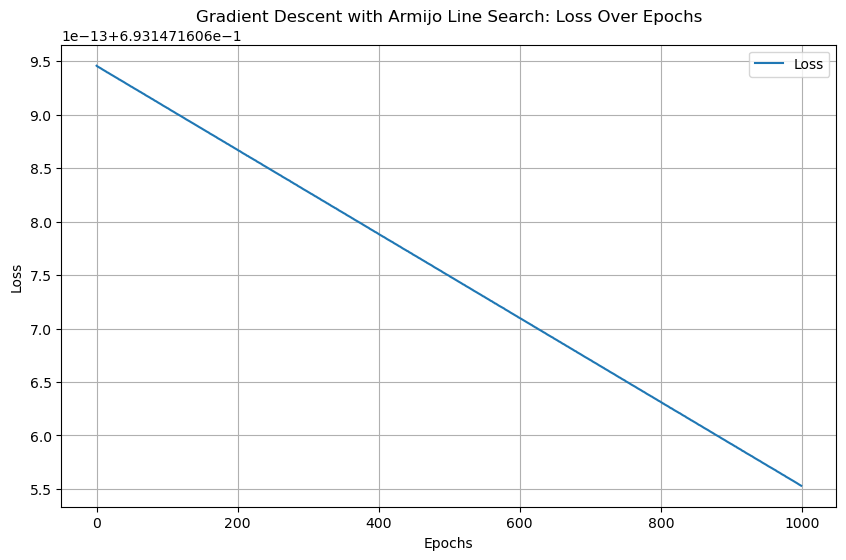

In [3]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Vaishnav Nigade, Roll No: 2022BCD0045
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert the 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target variable (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features to have mean 0 and variance 1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression using Gradient Descent with Armijo Line Search
class LogisticRegressionArmijo:
    def __init__(self, initial_lr=0.1, epochs=1000, sigma=0.1, beta=0.5):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - initial_lr: Initial step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - sigma: Armijo condition parameter (typically between 0 and 1).
        - beta: Factor to reduce the step size if Armijo condition is not met.
        """
        self.initial_lr = initial_lr
        self.epochs = epochs
        self.sigma = sigma
        self.beta = beta
        self.losses = []

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, X, y):
        """Compute Binary Cross-Entropy Loss."""
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
        return loss
    
    def fit(self, X, y):
        """
        Train the Logistic Regression model using Gradient Descent with Armijo Line Search.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights and bias to zero
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for epoch in range(self.epochs):
            # Step 1: Compute predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Step 2: Compute the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Step 3: Calculate gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)
            db = np.sum(error) / len(y)
            
            # Step 4: Armijo Line Search to find the optimal learning rate
            alpha = self.initial_lr
            while True:
                # Compute updated weights and bias with step size alpha
                new_weights = self.weights - alpha * dw
                new_bias = self.bias - alpha * db
                
                # Compute the loss with updated weights
                new_loss = self.compute_loss(X, y)
                
                # Check Armijo condition
                if new_loss <= loss - self.sigma * alpha * (np.linalg.norm(dw)**2 + db**2):
                    break  # Armijo condition met, stop reducing alpha
                alpha *= self.beta  # Reduce alpha if condition not met
            
            # Step 5: Update weights and bias using the optimal alpha found
            self.weights -= alpha * dw
            self.bias -= alpha * db
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Learning Rate: {alpha:.6f}")

    def predict(self, X):
        """Predict binary labels."""
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Armijo Line Search and evaluate its performance.
    """
    # Vaishnav Nigade, Roll No: 2022BCD0045
    # Load and preprocess data
    X, y = load_and_preprocess_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the Logistic Regression model with Armijo Line Search
    model = LogisticRegressionArmijo(initial_lr=0.1, epochs=1000, sigma=0.1, beta=0.5)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Gradient Descent with Armijo Line Search: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Run the training and evaluation function
train_and_evaluate()


# GD Plots

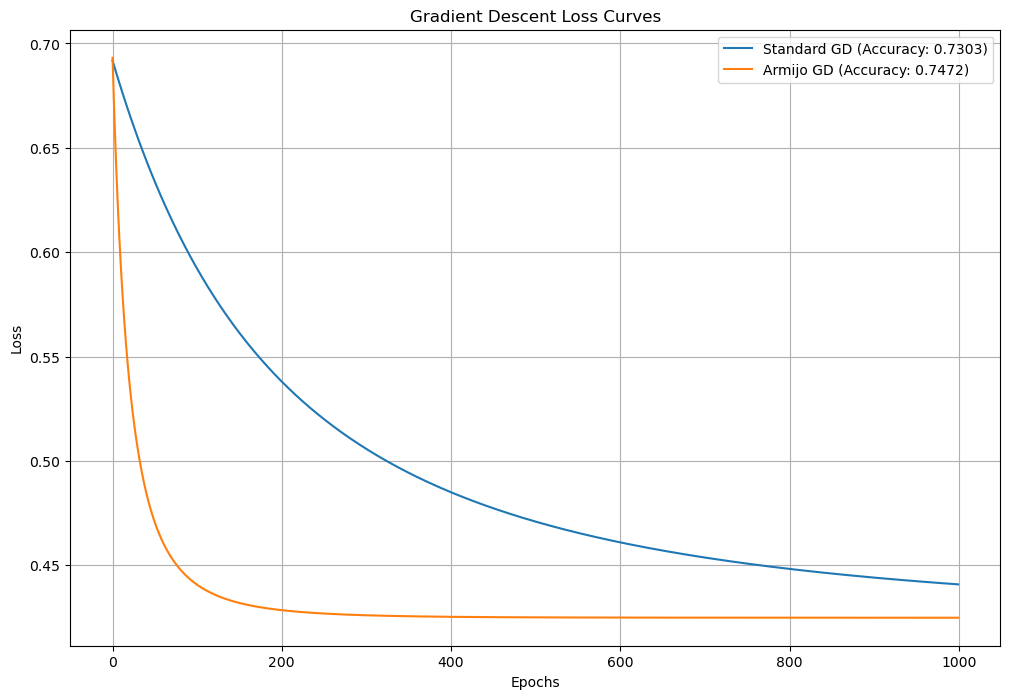

In [4]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)  # Drop irrelevant columns
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert 'Sex' to numerical values
    
    # Extract features (X) and target variable (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features to have mean 0 and variance 1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression using Standard Gradient Descent
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        loss = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
        return loss

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for epoch in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)
            db = np.sum(error) / len(y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            loss = self.compute_loss(X, y)
            self.losses.append(loss)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Implement Logistic Regression with Armijo Line Search
class LogisticRegressionArmijo(LogisticRegressionGD):
    def __init__(self, initial_lr=0.1, epochs=1000, sigma=0.1, beta=0.5):
        super().__init__(learning_rate=initial_lr, epochs=epochs)
        self.sigma = sigma
        self.beta = beta

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for epoch in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)
            db = np.sum(error) / len(y)
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            alpha = self.learning_rate
            while True:
                new_weights = self.weights - alpha * dw
                new_bias = self.bias - alpha * db
                z_new = np.dot(X, new_weights) + new_bias
                predictions_new = self.sigmoid(z_new)
                new_loss = -np.mean(y * np.log(predictions_new + 1e-8) + (1 - y) * np.log(1 - predictions_new + 1e-8))
                if new_loss <= loss - self.sigma * alpha * (np.linalg.norm(dw)**2 + db**2):
                    break
                alpha *= self.beta
            self.weights -= alpha * dw
            self.bias -= alpha * db

# Step 4: Train and plot results for all methods
def train_and_plot():
    X, y = load_and_preprocess_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Method 1: Standard Gradient Descent
    gd_model = LogisticRegressionGD(learning_rate=0.01, epochs=1000)
    gd_model.fit(X_train, y_train)
    y_pred_gd = gd_model.predict(X_test)
    accuracy_gd = accuracy_score(y_test, y_pred_gd)
    
    # Method 2: Gradient Descent with Armijo Line Search
    armijo_model = LogisticRegressionArmijo(initial_lr=0.1, epochs=1000, sigma=0.1, beta=0.5)
    armijo_model.fit(X_train, y_train)
    y_pred_armijo = armijo_model.predict(X_test)
    accuracy_armijo = accuracy_score(y_test, y_pred_armijo)
    
    # Plot the loss curves for both methods
    plt.figure(figsize=(12, 8))
    plt.plot(gd_model.losses, label=f'Standard GD (Accuracy: {accuracy_gd:.4f})')
    plt.plot(armijo_model.losses, label=f'Armijo GD (Accuracy: {accuracy_armijo:.4f})')
    plt.title("Gradient Descent Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the training and plotting function
train_and_plot()


# Visualizing the Himmelblau Function

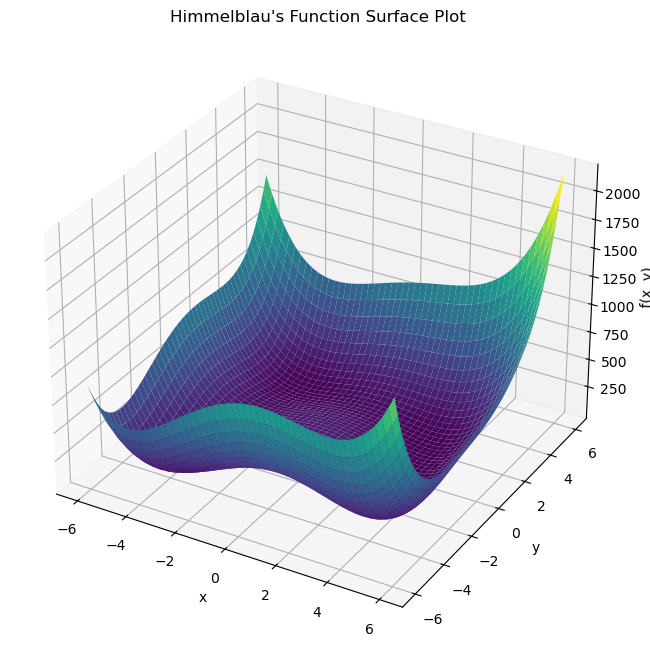

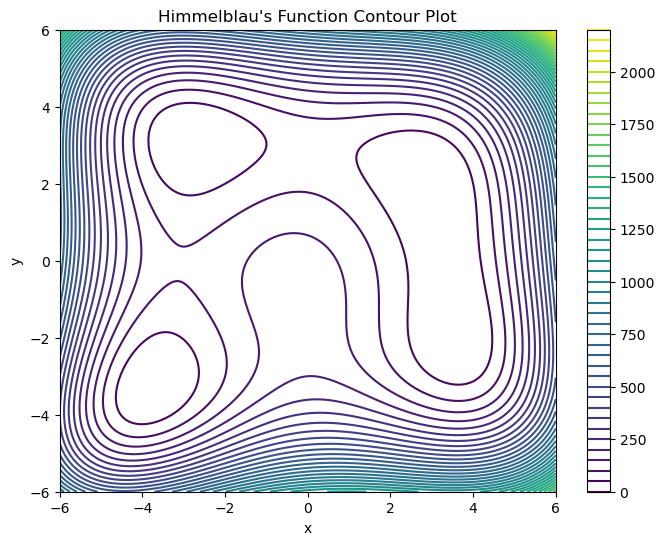

In [5]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Himmelblau function
def himmelblau(x, y):
    """
    Himmelblau's function: f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
    """
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Generate data for plotting
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

# Create a 3D surface plot of the Himmelblau function
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("Himmelblau's Function Surface Plot")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

# Create a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.title("Himmelblau's Function Contour Plot")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.show()


In [6]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from scipy.special import expit

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features.
    """
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize features for better optimization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Define the Logistic Regression model using Himmelblau-inspired optimization
class LogisticRegressionOptimizer:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.n_features = X.shape[1]
    
    def sigmoid(self, z):
        return expit(z)

    def compute_loss(self, weights):
        """
        Compute the binary cross-entropy loss for given weights.
        """
        z = np.dot(self.X, weights)
        predictions = self.sigmoid(z)
        loss = log_loss(self.y, predictions)
        return loss
    
    def fit(self):
        """
        Use optimization to minimize the binary cross-entropy loss function.
        """
        initial_weights = np.zeros(self.n_features)
        result = minimize(self.compute_loss, initial_weights, method='BFGS')
        self.weights = result.x
        print("Optimization Result:", result)
        return self.weights

    def predict(self, X):
        """
        Predict binary labels using the optimized weights.
        """
        z = np.dot(X, self.weights)
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model using the Titanic dataset
def train_and_evaluate():
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the Logistic Regression model using optimization
    model = LogisticRegressionOptimizer(X_train, y_train)
    model.fit()
    
    # Make predictions and evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")

# Run the training and evaluation function
train_and_evaluate()


Optimization Result:   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.45639444538471835
        x: [-8.582e-01  1.384e+00 -5.234e-01 -4.543e-01 -1.599e-01
             3.021e-01]
      nit: 26
      jac: [-4.638e-06  1.226e-06  2.142e-06  1.080e-07 -4.593e-06
             2.384e-07]
 hess_inv: [[ 1.112e+01 -1.280e+00 ... -1.424e+00  7.431e+00]
            [-1.280e+00  8.424e+00 ... -1.766e+00  4.470e-01]
            ...
            [-1.424e+00 -1.766e+00 ...  7.179e+00 -2.939e+00]
            [ 7.431e+00  4.470e-01 ... -2.939e+00  1.785e+01]]
     nfev: 189
     njev: 27
Accuracy on test set: 0.7528
